In [1]:
import sys
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import OrderedDict
import math
from matplotlib.lines import Line2D
from pylab import rcParams
from collections import Counter
from itertools import combinations
from shutil import copyfile
rcParams['figure.figsize'] = 25, 10
import numpy as np 
import random 
import datetime
import os 

np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
from codes.otherfunctions.multiplot import highlight_cell
from codes.experimentclasses.MalonaldehydeAngles import MalonaldehydeAngles
from codes.otherfunctions.multirun import get_coeffs_reps
#from codes.otherfunctions.multirun import get_grads_reps_pca2
from codes.otherfunctions.multiplot import plot_betas, plot_betas2reorder
from codes.geometer.RiemannianManifold import RiemannianManifold
from codes.otherfunctions.get_dictionaries import get_atoms_4
from codes.otherfunctions.get_grads import get_grads
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch
from codes.otherfunctions.multiplot import plot_gs_v_dgnorm
from codes.otherfunctions.multirun import get_cosines
from codes.otherfunctions.multiplot import plot_dot_distributions
from codes.geometer.ShapeSpace import ShapeSpace
from codes.geometer.TangentBundle import TangentBundle
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.multirun import get_olsnorm_and_supportsbrute
from codes.otherfunctions.multiplot import highlight_cell
from einops import rearrange


/Users/samsonkoelle/manifoldflasso_jmlr


In [3]:
import dill as pickle

In [12]:
#let us gaze into the malonaldehyde:
with open('/Users/samsonkoelle/Downloads/ethanol_010521_pallrep5n100replicates_small.pkl' ,
         'rb') as loader:
     replicates = pickle.load(loader)


In [35]:
np.sum(np.linalg.norm(replicates[1].df_M, axis=1) ** 2, axis=0)**(0.5)

array([0.08515712, 0.18325865, 0.36257501])

In [14]:
from codes.flasso.GradientGroupLasso import GradientGroupLasso



In [41]:
(dg_M[:,:,193]**2).sum()

0.2981855433422436

(array([96.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.]),
 array([1.34765758e-06, 7.54638180e-03, 1.50914159e-02, 2.26364501e-02,
        3.01814842e-02, 3.77265184e-02, 4.52715525e-02, 5.28165867e-02,
        6.03616208e-02, 6.79066549e-02, 7.54516891e-02]),
 <a list of 10 Patch objects>)

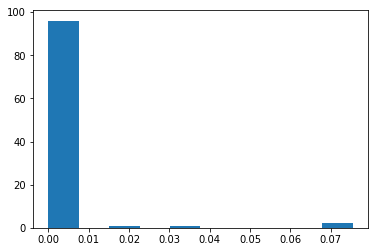

In [39]:
plt.hist((dg_M[:,:,193]**2).sum(axis = 1))

In [43]:
i = 1 #.025 too low
dg_M = replicates[i].dg_M
df_M = replicates[i].df_M
reg_l2 = np.asarray([0.])
learning_rate = 100.
tol = 1e-14
GGL1 = GradientGroupLasso(dg_M, df_M, np.asarray([0.03]), reg_l2, 500,learning_rate, tol, beta0_npm= None)
GGL1.fit()

0
lr 100.0
lr 50.0
lr 25.0
lr 12.5
lr 6.25
1
lr 6.25
2
lr 6.25
3
lr 6.25
4
lr 6.25
5
lr 6.25
6
lr 6.25
7
lr 6.25
8
lr 6.25
9
lr 6.25
10
lr 6.25
11
lr 6.25
12
lr 6.25
13
lr 6.25
14
lr 6.25
15
lr 6.25
16
lr 6.25
17
lr 6.25
18
lr 6.25
19
lr 6.25
20
lr 6.25
21
lr 6.25
22
lr 6.25
23
lr 6.25
24
lr 6.25
25
lr 6.25
26
lr 6.25
27
lr 6.25
28
lr 6.25
29
lr 6.25
30
lr 6.25
31
lr 6.25
32
lr 6.25
33
lr 6.25
34
lr 6.25
35
lr 6.25
36
lr 6.25
37
lr 6.25
38
lr 6.25
39
lr 6.25
40
lr 6.25
41
lr 6.25
42
lr 6.25
43
lr 6.25
44
lr 6.25
45
lr 6.25
46
lr 6.25
47
lr 6.25
48
lr 6.25
49
lr 6.25
50
lr 6.25
51
lr 6.25
52
lr 6.25
53
lr 6.25
54
lr 6.25
55
lr 6.25
56
lr 6.25
57
lr 6.25
58
lr 6.25
59
lr 6.25
60
lr 6.25
61
lr 6.25
62
lr 6.25
63
lr 6.25
64
lr 6.25
65
lr 6.25
66
lr 6.25
67
lr 6.25
68
lr 6.25
69
lr 6.25
70
lr 6.25
71
lr 6.25
72
lr 6.25
73
lr 6.25
74
lr 6.25
75
lr 6.25
76
lr 6.25
77
lr 6.25
78
lr 6.25
79
lr 6.25
80
lr 6.25
81
lr 6.25
82
lr 6.25
83
lr 6.25
84
lr 6.25
85
lr 6.25
86
lr 6.25
87
lr 6.25
88
lr 6.2

In [44]:
np.where(np.linalg.norm(np.linalg.norm(GGL1.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([193, 196, 214])

In [37]:
np.where(np.linalg.norm(np.linalg.norm(GGL1.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([ 33, 197, 362, 596, 603, 641, 661, 721, 745, 746])

In [28]:
i = 0  #.03 too high #.025 too low
dg_M = replicates[i].dg_M
df_M = replicates[i].df_M
reg_l2 = np.asarray([0.])
learning_rate = 100.
tol = 1e-14
GGL1 = GradientGroupLasso(dg_M, df_M, np.asarray([0.025]), reg_l2, 2500,learning_rate, tol, beta0_npm= None)
GGL1.fit()

0
lr 100.0
lr 50.0
lr 25.0
lr 12.5
lr 6.25
lr 3.125
lr 1.5625
lr 0.78125
1
lr 0.78125
2
lr 0.78125
3
lr 0.78125
4
lr 0.78125
5
lr 0.78125
6
lr 0.78125
7
lr 0.78125
8
lr 0.78125
9
lr 0.78125
10
lr 0.78125
11
lr 0.78125
12
lr 0.78125
13
lr 0.78125
14
lr 0.78125
15
lr 0.78125
16
lr 0.78125
17
lr 0.78125
18
lr 0.78125
19
lr 0.78125
20
lr 0.78125
21
lr 0.78125
22
lr 0.78125
23
lr 0.78125
24
lr 0.78125
25
lr 0.78125
26
lr 0.78125
27
lr 0.78125
28
lr 0.78125
29
lr 0.78125
30
lr 0.78125
31
lr 0.78125
32
lr 0.78125
33
lr 0.78125
34
lr 0.78125
35
lr 0.78125
36
lr 0.78125
37
lr 0.78125
38
lr 0.78125
39
lr 0.78125
40
lr 0.78125
41
lr 0.78125
42
lr 0.78125
43
lr 0.78125
44
lr 0.78125
45
lr 0.78125
46
lr 0.78125
47
lr 0.78125
48
lr 0.78125
49
lr 0.78125
50
lr 0.78125
51
lr 0.78125
52
lr 0.78125
53
lr 0.78125
54
lr 0.78125
55
lr 0.78125
56
lr 0.78125
57
lr 0.78125
58
lr 0.78125
59
lr 0.78125
60
lr 0.78125
61
lr 0.78125
62
lr 0.78125
63
lr 0.78125
64
lr 0.78125
65
lr 0.78125
66
lr 0.78125
67
lr 0.7812

552
lr 0.78125
553
lr 0.78125
554
lr 0.78125
555
lr 0.78125
556
lr 0.78125
557
lr 0.78125
558
lr 0.78125
559
lr 0.78125
560
lr 0.78125
561
lr 0.78125
562
lr 0.78125
563
lr 0.78125
564
lr 0.78125
565
lr 0.78125
566
lr 0.78125
567
lr 0.78125
568
lr 0.78125
569
lr 0.78125
570
lr 0.78125
571
lr 0.78125
572
lr 0.78125
573
lr 0.78125
574
lr 0.78125
575
lr 0.78125
576
lr 0.78125
577
lr 0.78125
578
lr 0.78125
579
lr 0.78125
580
lr 0.78125
581
lr 0.78125
582
lr 0.78125
583
lr 0.78125
584
lr 0.78125
585
lr 0.78125
586
lr 0.78125
587
lr 0.78125
588
lr 0.78125
589
lr 0.78125
590
lr 0.78125
591
lr 0.78125
592
lr 0.78125
593
lr 0.78125
594
lr 0.78125
595
lr 0.78125
596
lr 0.78125
597
lr 0.78125
598
lr 0.78125
599
lr 0.78125
600
lr 0.78125
601
lr 0.78125
602
lr 0.78125
603
lr 0.78125
604
lr 0.78125
605
lr 0.78125
606
lr 0.78125
607
lr 0.78125
608
lr 0.78125
609
lr 0.78125
610
lr 0.78125
611
lr 0.78125
612
lr 0.78125
613
lr 0.78125
614
lr 0.78125
615
lr 0.78125
616
lr 0.78125
617
lr 0.78125
618
lr 0.7

In [29]:
np.where(np.linalg.norm(np.linalg.norm(GGL1.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([ 33, 213])

In [31]:
(dg_M[:,:,33]**2).sum()

0.37808298551433006

In [32]:
(dg_M[:,:,213]**2).sum()

0.3239225301520525

(array([76.,  8.,  2.,  0.,  5.,  1.,  6.,  1.,  0.,  1.]),
 array([0.00052399, 0.00308064, 0.0056373 , 0.00819395, 0.01075061,
        0.01330726, 0.01586392, 0.01842057, 0.02097723, 0.02353388,
        0.02609054]),
 <a list of 10 Patch objects>)

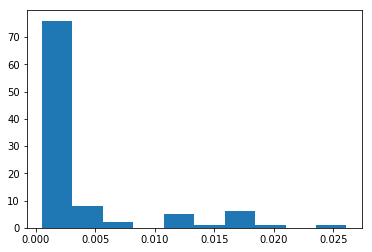

In [34]:
plt.hist((dg_M[:,:,33]**2).sum(axis = 1))